# Plotting for Project 1 FYS3150

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

output_dir = os.path.join(os.getcwd(), '../output')

## Problem 2

We will start by opening the problem2data.out file created by problem2.cpp. Once the data is opened we convert to dataframe and 

In [16]:
with open(os.path.join(output_dir, 'problem2data.out'), 'r') as f:
    problem2df = pd.read_csv(f, sep=' ')

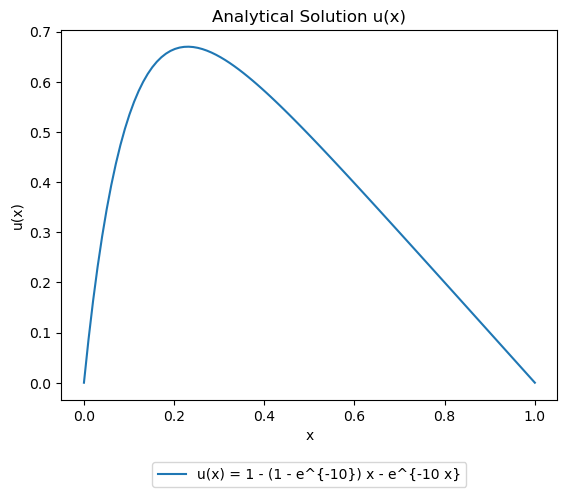

In [25]:
plt.plot(problem2df['x'], problem2df['u'], label=r'u(x) = 1 - (1 - e^{-10}) x - e^{-10 x}')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Analytical Solution u(x)')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()